In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("index.csv")
print(df.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [4]:
df=df.dropna()

In [5]:
print(df.isnull().sum())

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


/var/folders/s8/mn29lmvx1jz63xm381ylht900000gn/T/ipykernel_57286/2946435924.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='coffee_name', y='money', data=df, estimator=np.mean, ci=None)


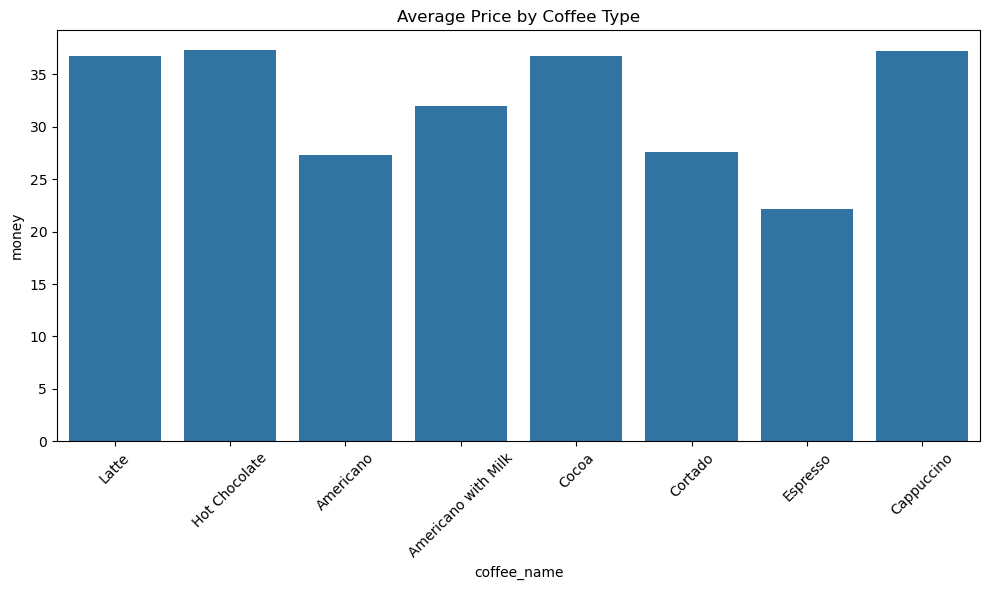

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='coffee_name', y='money', data=df, estimator=np.mean, ci=None)
plt.title("Average Price by Coffee Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


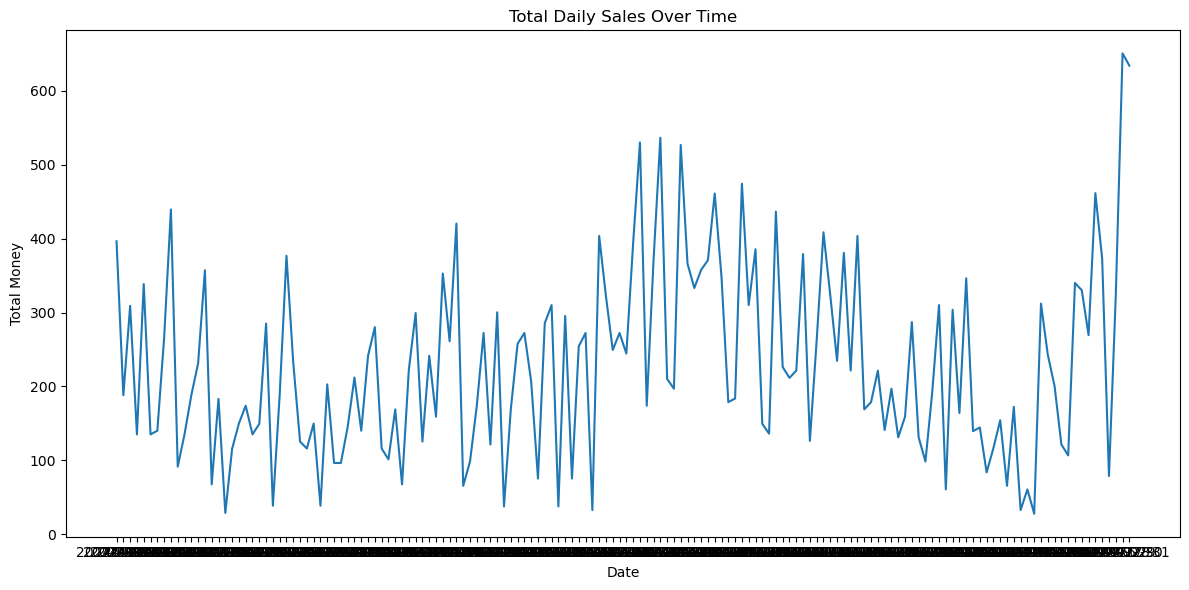

In [7]:
daily_sales = df.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='money', data=daily_sales)
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Money")
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
label_encoders = {}
for col in ['coffee_name', 'cash_type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
X = df[['coffee_name', 'cash_type']]  
y = df['money']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("✅ Model Performance:")
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))



✅ Model Performance:
R² Score: 0.8008
RMSE: 2.18


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:

sample = X_test.iloc[0]
predicted_price = model.predict([sample])
print("\n📊 Sample Prediction:")
print("Predicted Price:", round(predicted_price[0], 2))
print("Actual Price:", y_test.iloc[0])



📊 Sample Prediction:
Predicted Price: 37.3
Actual Price: 32.82


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
